In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()


food_source_color = '#7DC160'
# total_energy_color = '#f4cccc'
fish_energy_color = '#4e73b0'
# 7DC160

In [2]:
results_df: pd.DataFrame = pd.read_csv('0g_fed_weight.csv')
results_df.head()

,Step,TimeStamp,AvgEnergy,AverageEnergy_5th,AverageEnergy_95th,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.001001,384.0000,384.0000,384.0000,25,1,450.0000,0.492735,4.853849
1,1,3.872750,383.9470,383.9470,383.9470,25,1,452.7257,0.305098,0.939088
2,2,7.701284,383.8940,383.8940,383.8940,25,1,455.4514,0.362933,1.038594
3,3,11.703310,383.8409,383.8409,383.8409,25,1,458.1771,0.374034,0.918993
4,4,15.606200,383.7879,383.7879,383.7879,25,1,460.9028,0.394340,0.738634


In [3]:
fb4_df = pd.read_csv('fb4/fb4_0g_fed_weight.csv')

fb4_df['Hours'] = fb4_df['Day'] * 24

new_row = {'Day': 0, 'Weight.g': 384, 'Hours': 0}
fb4_df = fb4_df.append(new_row, ignore_index=True)

fb4_df

C:\Users\Niels\AppData\Local\Temp\ipykernel_43916\2789459098.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fb4_df = fb4_df.append(new_row, ignore_index=True)


,Unnamed: 0,Day,Temperature.C,Weight.g,Hours
0,1.0,1,5.0,382.727310,24
1,2.0,2,5.0,381.457436,48
2,3.0,3,5.0,380.190376,72
3,4.0,4,5.0,378.926128,96
4,5.0,5,5.0,377.664691,120
5,6.0,6,5.0,376.406062,144
6,7.0,7,5.0,375.150240,168
7,8.0,8,5.0,373.897224,192
8,9.0,9,5.0,372.647011,216
9,10.0,10,5.0,371.399600,240


In [9]:
# Configuration:

truncated_df_1 = results_df.iloc[1:721]

# Only keep the records where step is a multiple of 10
truncated_df_1 = truncated_df_1[truncated_df_1['Step'] % 10 == 0]

print(truncated_df_1.describe())


             Step    TimeStamp   AvgEnergy  AverageEnergy_5th  \
count   72.000000    72.000000   72.000000          72.000000   
mean   365.000000  1429.098013  365.073329         365.073329   
std    209.284495   827.375522   10.727523          10.727523   
min     10.000000    38.644360  347.077400         347.077400   
25%    187.500000   728.918550  355.947325         355.947325   
50%    365.000000  1418.427000  364.968900         364.968900   
75%    542.500000  2133.160000  374.142900         374.142900   
max    720.000000  2841.660000  383.470000         383.470000   

       AverageEnergy_95th  NoBoids  NoFoodSources  TotalFoodAvailable  \
count           72.000000     72.0           72.0           72.000000   
mean           365.073329     25.0            1.0          771.195024   
std             10.727523      0.0            0.0           75.520928   
min            347.077400     25.0            1.0          477.257000   
25%            355.947325     25.0            1.0

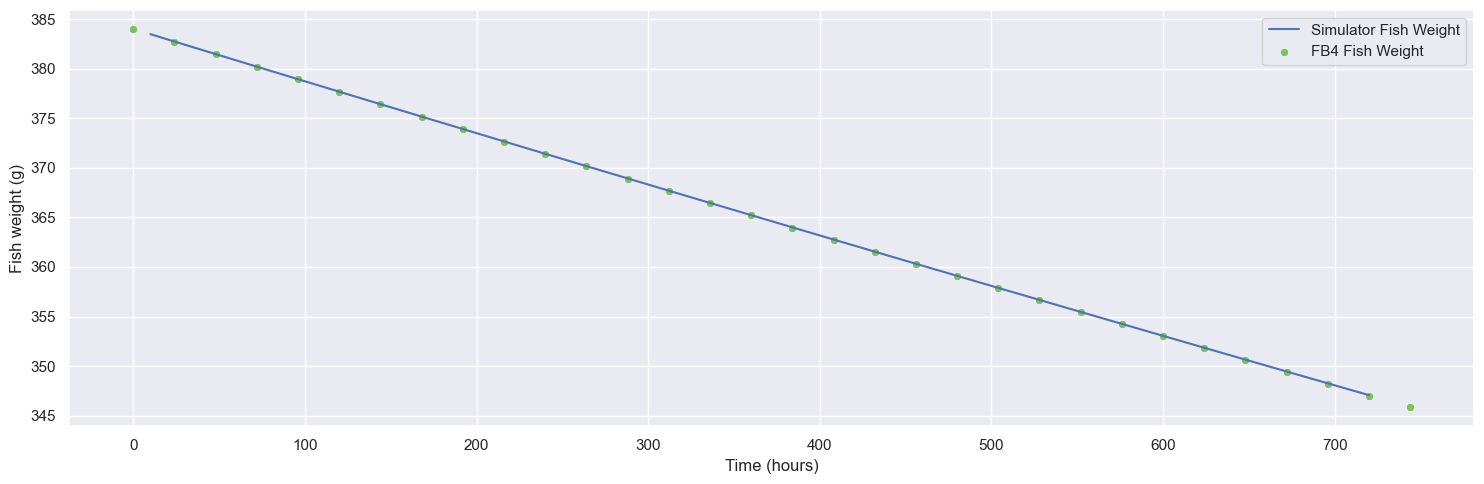

In [11]:
fig = plt.figure(figsize=(15, 5))

sns.lineplot(data=truncated_df_1, x='Step', y='AvgEnergy', label='Simulator Fish Weight', color=fish_energy_color)
sns.scatterplot(data=fb4_df, x='Hours', y='Weight.g', label='FB4 Fish Weight', color=food_source_color)
plt.xlabel('Time (hours)')
plt.ylabel('Fish weight (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp4-bioenergetics-0g.pdf')